## 데이터 불러오기, 확인하기

In [ ]:
!rm -rf cat* # cat으로 시작하는 파일을 삭제함, 안하면 .1, .2 처럼 생김
!wget https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/data/cat_and_dog.zip

--2021-12-27 01:22:35--  https://github.com/dhrim/MDC_2021/raw/master/material/deep_learning/data/cat_and_dog.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/cat_and_dog.zip [following]
--2021-12-27 01:22:35--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/data/cat_and_dog.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18902400 (18M) [application/zip]
Saving to: ‘cat_and_dog.zip’

cat_and_dog.zip     100%[===================>]  18.03M  --.-KB/s    in 0.1s    

2021-12-27 01:22:35 (169 MB/s) - ‘cat_and

In [ ]:
!unzip cat_and_dog.zip

Archive:  cat_and_dog.zip
   creating: cat_and_dog/
   creating: cat_and_dog/test/
   creating: cat_and_dog/test/Cat/
  inflating: cat_and_dog/test/Cat/189.jpg  
  inflating: cat_and_dog/test/Cat/200.jpg  
  inflating: cat_and_dog/test/Cat/229.jpg  
  inflating: cat_and_dog/test/Cat/89.jpg  
  inflating: cat_and_dog/test/Cat/60.jpg  
  inflating: cat_and_dog/test/Cat/149.jpg  
  inflating: cat_and_dog/test/Cat/160.jpg  
  inflating: cat_and_dog/test/Cat/49.jpg  
  inflating: cat_and_dog/test/Cat/59.jpg  
  inflating: cat_and_dog/test/Cat/170.jpg  
  inflating: cat_and_dog/test/Cat/159.jpg  
  inflating: cat_and_dog/test/Cat/70.jpg  
  inflating: cat_and_dog/test/Cat/99.jpg  
  inflating: cat_and_dog/test/Cat/239.jpg  
  inflating: cat_and_dog/test/Cat/210.jpg  
  inflating: cat_and_dog/test/Cat/199.jpg  
  inflating: cat_and_dog/test/Cat/9.jpg  
  inflating: cat_and_dog/test/Cat/129.jpg  
  inflating: cat_and_dog/test/Cat/289.jpg  
  inflating: cat_and_dog/test/Cat/100.jpg  
  inflatin

In [ ]:
!apt-get udpate
!apt install tree

E: Invalid operation udpate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!tree -d cat_and_dog

cat_and_dog
├── test
│   ├── Cat
│   └── Dog
└── train
    ├── Cat
    └── Dog

6 directories


In [ ]:
!ls -al cat_and_dog/train/Cat/*.jpg | wc
!ls -al cat_and_dog/train/Dog/*.jpg | wc
!ls -al cat_and_dog/test/Cat/*.jpg | wc
!ls -al cat_and_dog/test/Dog/*.jpg | wc

    240    2160   17432
    240    2160   17432
     61     549    4370
     61     549    4370


## 로스 실시간 출력

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

## 머신러닝 학습

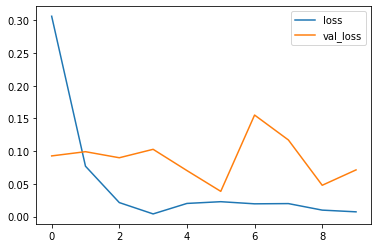

loss =  0.0072563411667943 , val_loss =  0.07136016339063644
2/2 [==============================] - 1s 189ms/step - loss: 0.0714 - acc: 0.9918
loss= 0.07136016339063644
acc= 0.9918032884597778


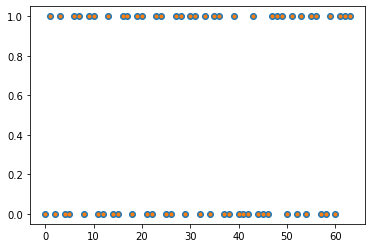

label category index = 0.0
predicted category index = 0
predicted category name = Cat


In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "cat_and_dog/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "cat_and_dog/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

plot_losses = PlotLosses()
history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      epochs=10, callbacks=[plot_losses]
)


# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


## 모델 저장

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model('my_model.h5')

In [ ]:
loss, acc = loaded_model.evaluate(test_data_generator)
print('losses = ', loss)
print('acc = ', acc)

2/2 [==============================] - 2s 195ms/step - loss: 0.0405 - acc: 0.9836
losses =  0.04051125794649124
acc =  0.9836065769195557


## 로드한 모델 예측

(58, 224, 224, 3)
(58,)
[0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1
 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1]
predicted=0, truth=0.0


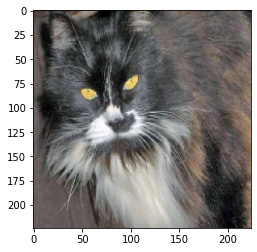

predicted=1, truth=1.0


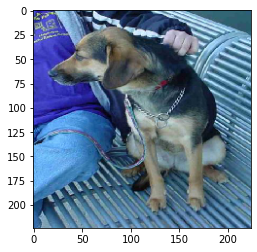

predicted=0, truth=0.0


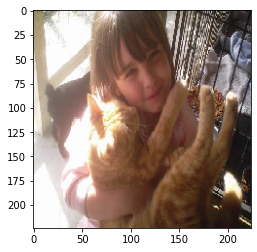

predicted=1, truth=0.0


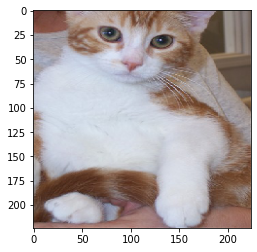

predicted=0, truth=0.0


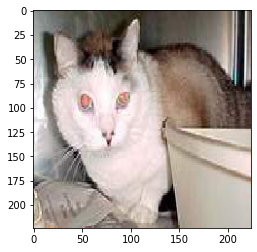

In [ ]:
batch_x, batch_y = next(test_data_generator)
print(batch_x.shape)
print(batch_y.shape)
loaded_model.predict(test_data_generator)
predicted = np.argmax(y_,axis=1)
print(predicted)

for i in range(5):
  plt.imshow(batch_x[i].astype(np.int))
  print("predicted={}, truth={}".format(predicted[i], batch_y[i]))
  plt.show()

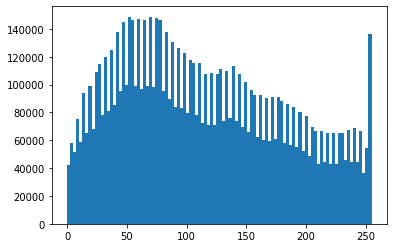

In [ ]:
plt.hist(batch_x.flatten(), bins=100)
plt.show()

## 다른 포멧으로 저장

In [ ]:
model.save("my_model")

In [ ]:
loaded_model = keras.models.load_model('my_model')

## weight로 저장 로딩

In [ ]:
model.save_weights('my_model_weight')

In [ ]:
model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

model.load_weights('my_model_weight')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 flatten_8 (Flatten)         (None, 68992)             0         
                                                                 
 dense_16 (Dense)            (None, 256)               17662208  
                                                                 
 batch_normalization_8 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 2)                 514       
                                                                 
Total params: 25,432,315
Trainable params: 17,663,234
Non-trainable params: 7,769,081
__________________________________

## 다른 방식의 모델 예측

Found 122 images belonging to 2 classes.


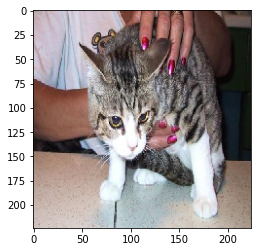

test_y = 0 , predicted = 0


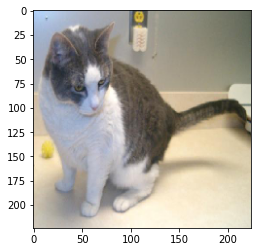

test_y = 0 , predicted = 0


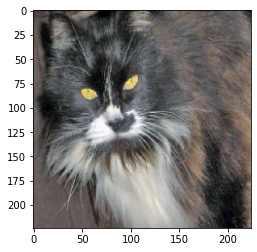

test_y = 0 , predicted = 0


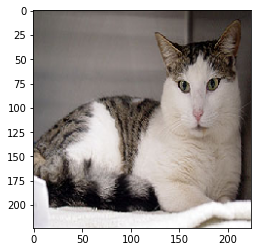

test_y = 0 , predicted = 0


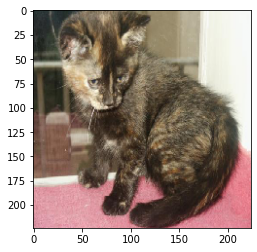

test_y = 0 , predicted = 0


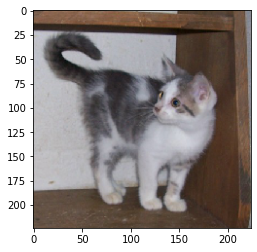

test_y = 0 , predicted = 0


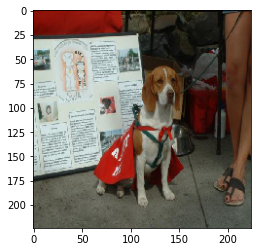

test_y = 1 , predicted = 1


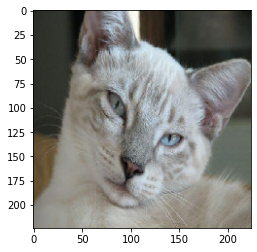

test_y = 0 , predicted = 0


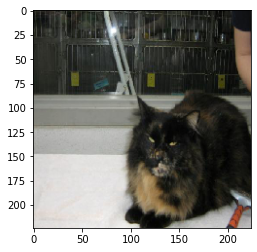

test_y = 0 , predicted = 0


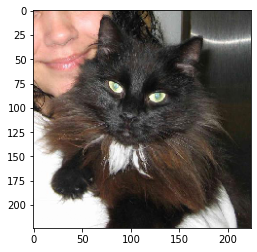

test_y = 0 , predicted = 0


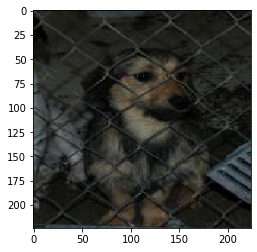

test_y = 1 , predicted = 1


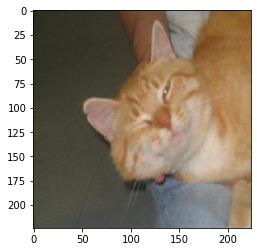

test_y = 0 , predicted = 0


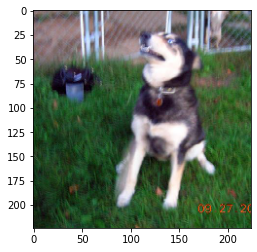

test_y = 1 , predicted = 1


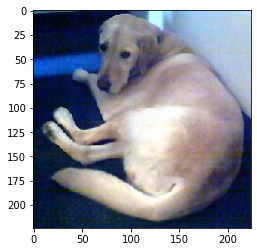

test_y = 1 , predicted = 1


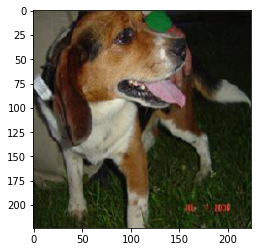

test_y = 1 , predicted = 1


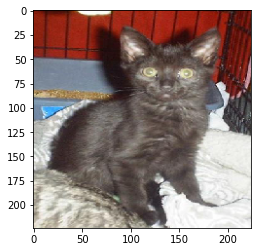

test_y = 0 , predicted = 0


In [ ]:
from tensorflow.keras.applications import vgg16

test_data_generator = ImageDataGenerator(
      # 원 이미지를 그려주기 위해 전처리 함수를 사용 하지 않은 이미지를 읽는다.
      # 모델 호출 시에 직접 전처리 함수를 호출한다.
      # preprocessing_function=vgg16.preprocess_input
).flow_from_directory(
      "cat_and_dog/test",
      target_size=(224,224),
      batch_size=16,
      class_mode='sparse'
)


while True:
  # 한번에 batch_size 16개 만큼 꺼낸다.
  # test_x와 test_y에는 16개가 담겼다.
  test_x, test_y = next(test_data_generator)

  # 모델 호출하기 위해 전처리 함수를 호출하고
  preprocessed_test_x = vgg16.preprocess_input(test_x.copy())

  # 모델로 예측 하고(내가 만든 모델을 넣었다)
  y_ = loaded_model.predict(preprocessed_test_x)

  # category index를 구한다.
  predicted = np.argmax(y_, axis=1)

  # 16개 이미지에 대하여 각각 그려보고 정답과 예측 값을 출력한다.
  for i, a_image in enumerate(test_x):
    plt.imshow(a_image/255.0)
    plt.show()
    print("test_y =", test_y.astype(int)[i], ", predicted =", predicted[i])
  break

